## Import Library

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from fcmeans import FCM
import seaborn as sns
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
df = pd.read_excel('dataset/dataset.xlsx')

In [3]:
df

,No,Afd,Tahun Tanam,Blok,Luas (Ha),Pokok,Tandan Sawit,KG
0,1,IV,1986,1212,19.0,2603,306,5060.0
1,2,IV,1986,1214,10.5,1438,164,2830.0
2,3,IV,1987,1212,3.0,408,74,1220.0
3,4,IV,1987,1213,18.0,1805,278,4640.0
4,5,IV,1987,1214,7.0,454,111,1830.0
5,6,IV,1987,1313,10.0,1239,164,2690.0
6,7,IV,1987,1314,25.0,3429,358,5990.0
7,8,IV,1987,1412,1.0,65,18,290.0
8,9,IV,1987,1413,17.0,944,210,3420.0
9,10,IV,1987,1414,22.0,2401,351,6210.0


## Cek Missing Values

In [4]:
df.isna().sum()

No              0
Afd             0
Tahun Tanam     0
Blok            0
Luas (Ha)       0
Pokok           0
Tandan Sawit    0
KG              0
dtype: int64

## Inisiasi X

In [5]:
X = df.drop(columns=['Afd','No','Blok'])

## Normalisasi Dataset

In [6]:
scaler = MinMaxScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

## C-Means

In [8]:
fcm = FCM(n_clusters=3,error=0.002,max_iter=1000,random_state=0,verbose=1,expo=2)
fcm.fit(X_scaled)

In [9]:
centers = fcm.centers
labels = fcm.u.argmax(axis=1)

In [10]:
centers

array([[0.27544576, 0.18077275, 0.12876444, 0.09071279, 0.08776819],
       [0.90052392, 0.33580238, 0.33372226, 0.19539605, 0.17633917],
       [0.31049432, 0.76889699, 0.61307515, 0.42564367, 0.41729928]])

In [11]:
labels

array([2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [12]:
df['Cluster'] = labels

In [13]:
def conv_cluster(cluster):
    if cluster == 0:
        return 'c1'
    elif cluster == 1:
        return 'c2'
    else:
        return 'c3'
df['Cluster'] = df['Cluster'].apply(conv_cluster)

## Hasil Cluster

In [2]:
df

NameError: name 'df' is not defined

## Visualisasi Cluster

In [1]:
sns.countplot(df['Cluster'])

NameError: name 'sns' is not defined

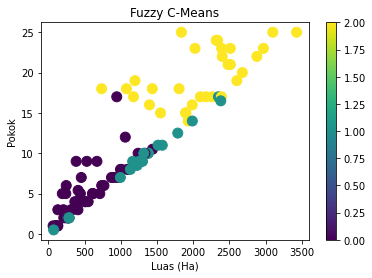

In [16]:

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Pokok'],df['Luas (Ha)'],
                     c=labels,s=100)
ax.set_title('Fuzzy C-Means')
ax.set_xlabel('Luas (Ha)')
ax.set_ylabel('Pokok')
plt.colorbar(scatter);

In [17]:
cluster_a = df[df['Cluster'] == 'c1']
cluster_b = df[df['Cluster'] == 'c2']
cluster_c = df[df['Cluster'] == 'c3']

a = len(cluster_a)/len(df)*100
b = len(cluster_b)/len(df)*100
c = len(cluster_c)/len(df)*100
li = [a,b,c]

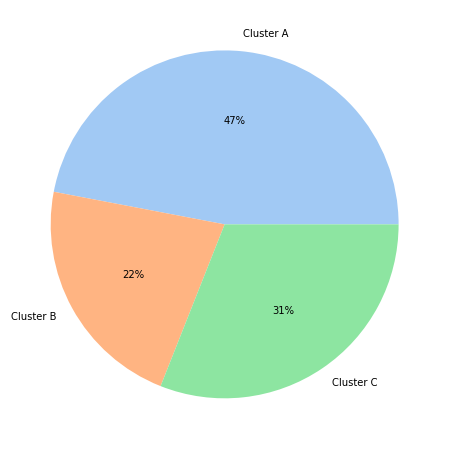

In [18]:
labels = ['Cluster A','Cluster B','Cluster C']
fig = plt.figure(figsize = (8, 8))
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(li, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Export Hasil 

In [19]:
df.to_excel('Hsil Cluster2.xlsx', index = False)

In [20]:
cluster_a

,No,Afd,Tahun Tanam,Blok,Luas (Ha),Pokok,Tandan Sawit,KG,Cluster
1,2,IV,1986,1214,10.5,1438,164,2830.0,c1
2,3,IV,1987,1212,3.0,408,74,1220.0,c1
4,5,IV,1987,1214,7.0,454,111,1830.0,c1
5,6,IV,1987,1313,10.0,1239,164,2690.0,c1
7,8,IV,1987,1412,1.0,65,18,290.0,c1
8,9,IV,1987,1413,17.0,944,210,3420.0,c1
10,11,IV,1988,1116,5.0,240,54,910.0,c1
11,12,IV,1988,1213,2.0,212,47,820.0,c1
12,13,IV,1989,1213,2.0,249,68,1230.0,c1
13,14,IV,1989,1214,1.0,112,18,330.0,c1


In [21]:
cluster_b

,No,Afd,Tahun Tanam,Blok,Luas (Ha),Pokok,Tandan Sawit,KG,Cluster
34,35,VI,1998,1420,9.0,1164,333,5870.0,c2
38,39,VI,2008,23.R,10.0,1379,250,4400.0,c2
39,40,VI,2008,24.R,2.0,276,120,2070.0,c2
40,41,VI,2008,23.Q,17.0,2349,339,5870.0,c2
41,42,VI,2008,24.Q,10.0,1378,300,4750.0,c2
42,43,VI,2008,25.Q,8.0,1095,217,3410.0,c2
43,44,VII,2008,22.P,11.0,1515,471,8090.0,c2
44,45,VII,2008,23.P,9.0,1253,297,5120.0,c2
45,46,VII,2008,24.P,7.0,965,233,4040.0,c2
46,47,VII,2008,25.P,2.0,270,120,1900.0,c2


In [22]:
cluster_c

,No,Afd,Tahun Tanam,Blok,Luas (Ha),Pokok,Tandan Sawit,KG,Cluster
0,1,IV,1986,1212,19.0,2603,306,5060.0,c3
3,4,IV,1987,1213,18.0,1805,278,4640.0,c3
6,7,IV,1987,1314,25.0,3429,358,5990.0,c3
9,10,IV,1987,1414,22.0,2401,351,6210.0,c3
20,21,V,1994,1312,18.0,1435,164,2890.0,c3
22,23,V,1986,1518,17.0,2100,532,10130.0,c3
25,26,V,1986,1618,15.0,1895,430,7630.0,c3
27,28,V,1987,1519,16.0,1987,536,9590.0,c3
28,29,V,1987,1619,25.0,3100,520,8640.0,c3
31,32,VI,1998,1322,17.0,2265,808,14200.0,c3
